In [1]:
import unittest

import pandas as pd
import numpy as np
from CardSim.Generator.cardsim import Cardsim as Cardsim
from banksys.card import Card
from banksys.terminal import Terminal
from banksys.transaction import Transaction
from banksys.banksys import Banksys
from banksys.classification import ClassificationSystem
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# This is a test file for the Banksys system.

In [2]:
import pickle

banksys = pickle.load(open("cache/banksys.pkl", "rb"))
payers = pd.read_csv("cache/payers-10000.csv")
payees = pd.read_csv("cache/payees-10000.csv")
transactions = pd.read_csv("cache/transactions-10000-50-2023-01-01.csv")


C:\Users\dalun\PycharmProjects\RL_Attack_September24\venv\lib\site-packages\sklearn\base.py:380: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.5.2 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\dalun\PycharmProjects\RL_Attack_September24\venv\lib\site-packages\sklearn\base.py:380: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.5.2 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [3]:
transactions

,day_index,date,payer_id,credit_card,remote,amount,payee_id,distance,time_seconds,date_time,hour,fraud,run_id
0,0,2023-01-01,0,0,1,26.49,552,96.896850,42526,2023-01-01 11:48:46,11,0,SNoneP10000D50
1,0,2023-01-01,0,0,0,17.50,245,96.772930,43480,2023-01-01 12:04:40,12,0,SNoneP10000D50
2,0,2023-01-01,1,0,0,15.85,113,62.769420,42958,2023-01-01 11:55:58,11,0,SNoneP10000D50
3,0,2023-01-01,3,0,0,7.97,475,68.476270,32372,2023-01-01 08:59:32,8,0,SNoneP10000D50
4,0,2023-01-01,4,0,0,11.12,188,46.238514,62304,2023-01-01 17:18:24,17,0,SNoneP10000D50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
429834,49,2023-02-19,9984,1,0,6.12,518,126.019840,45943,2023-02-19 12:45:43,12,0,SNoneP10000D50
429835,49,2023-02-19,9985,0,0,18.47,988,61.000000,70912,2023-02-19 19:41:52,19,0,SNoneP10000D50
429836,49,2023-02-19,9985,0,0,39.45,901,103.368270,56644,2023-02-19 15:44:04,15,0,SNoneP10000D50
429837,49,2023-02-19,9991,0,0,5.69,744,105.118980,41133,2023-02-19 11:25:33,11,0,SNoneP10000D50


In [4]:
len(banksys.terminals),  len(banksys.terminals[0].transactions)

(1000, 539)

In [5]:
[trx for trx in  banksys.terminals[0].transactions if trx.card_id==6197]

[Transaction(amount=20.74, timestamp=datetime.datetime(2023, 1, 19, 8, 58, 46), terminal_id=0, is_online=0, card_id=6197, label=0)]

In [6]:
banksys.terminals[0].transactions[200]

Transaction(amount=20.74, timestamp=datetime.datetime(2023, 1, 19, 8, 58, 46), terminal_id=0, is_online=0, card_id=6197, label=0)

In [7]:
np.unique_counts([trx.card_id for trx in  banksys.terminals[400].transactions])


UniqueCountsResult(values=array([  12,   20,   96,  109,  120,  141,  178,  200,  245,  271,  278,
        311,  323,  325,  333,  370,  374,  380,  413,  448,  482,  487,
        499,  559,  569,  575,  580,  582,  669,  686,  764,  802,  936,
        954,  974, 1056, 1079, 1080, 1131, 1135, 1191, 1227, 1231, 1252,
       1277, 1316, 1332, 1335, 1369, 1393, 1453, 1457, 1555, 1580, 1610,
       1616, 1666, 1680, 1720, 1777, 1800, 1840, 1852, 1854, 1855, 1915,
       1935, 1942, 1986, 2014, 2055, 2059, 2157, 2196, 2210, 2298, 2309,
       2315, 2387, 2434, 2509, 2512, 2539, 2566, 2592, 2610, 2641, 2792,
       2797, 2828, 2952, 3017, 3061, 3125, 3155, 3161, 3172, 3203, 3277,
       3294, 3296, 3312, 3360, 3434, 3457, 3494, 3510, 3511, 3539, 3567,
       3573, 3580, 3592, 3628, 3635, 3676, 3686, 3730, 3734, 3744, 3758,
       3789, 3809, 3815, 3890, 3922, 3923, 3943, 3985, 4003, 4029, 4106,
       4109, 4167, 4178, 4181, 4236, 4254, 4278, 4285, 4290, 4338, 4427,
       4466, 4574, 4587, 

In [8]:
np.unique_counts([trx.label for trx in  banksys.terminals[400].transactions])

UniqueCountsResult(values=array([0, 1]), counts=array([360,   7]))

## Transactions grouping


In [9]:
payees.columns, payers.columns, transactions.columns

(Index(['payee_id', 'payee_x', 'payee_y'], dtype='object'),
 Index(['payer_id', 'payer_x', 'payer_y', 'mean_frequency', 'debit_mean',
        'debit_sd', 'credit_mean', 'credit_sd', 'debit_mean_fraud',
        'credit_mean_fraud', 'debit_ln_mu', 'credit_ln_mu', 'debit_ln_sd',
        'credit_ln_sd', 'debit_ln_mu_fraud', 'credit_ln_mu_fraud'],
       dtype='object'),
 Index(['day_index', 'date', 'payer_id', 'credit_card', 'remote', 'amount',
        'payee_id', 'distance', 'time_seconds', 'date_time', 'hour', 'fraud',
        'run_id'],
       dtype='object'))

In [10]:
## Case 1: Unknown payer X

In [11]:
# Join payees and transactions
payees_transactions = pd.merge(payees, transactions, left_on="payee_id", right_on="payee_id")

In [12]:
payees_transactions

,payee_id,payee_x,payee_y,day_index,date,payer_id,credit_card,remote,amount,distance,time_seconds,date_time,hour,fraud,run_id
0,0,124,96,0,2023-01-01,623,0,0,53.19,34.525352,45997,2023-01-01 12:46:37,12,0,SNoneP10000D50
1,0,124,96,0,2023-01-01,718,1,0,7.15,92.800865,50685,2023-01-01 14:04:45,14,0,SNoneP10000D50
2,0,124,96,0,2023-01-01,1337,0,0,6.18,26.570660,27045,2023-01-01 07:30:45,7,0,SNoneP10000D50
3,0,124,96,0,2023-01-01,1766,1,0,33.56,49.040800,36729,2023-01-01 10:12:09,10,0,SNoneP10000D50
4,0,124,96,0,2023-01-01,3379,0,0,87.91,76.922035,34287,2023-01-01 09:31:27,9,0,SNoneP10000D50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
429834,999,15,197,49,2023-02-19,5172,1,1,14.86,129.340640,10661,2023-02-19 02:57:41,2,1,SNoneP10000D50
429835,999,15,197,49,2023-02-19,5832,0,1,9.90,54.037025,56952,2023-02-19 15:49:12,15,0,SNoneP10000D50
429836,999,15,197,49,2023-02-19,9087,1,1,9.64,108.300510,49410,2023-02-19 13:43:30,13,0,SNoneP10000D50
429837,999,15,197,49,2023-02-19,9575,0,0,16.23,150.960270,72845,2023-02-19 20:14:05,20,0,SNoneP10000D50


In [13]:
# Convert date_time to datetime
payees_transactions['date_time'] = pd.to_datetime(payees_transactions['date_time'])

In [14]:
payees_transactions['hour'] = payees_transactions['date_time'].dt.hour
payees_transactions['hour'].head()

0    12
1    14
2     7
3    10
4     9
Name: hour, dtype: int32

In [15]:
min_day = payees_transactions['date_time'].min()
# Calculate delta_day for each transaction
payees_transactions['delta_day'] = (payees_transactions['date_time'] - min_day).dt.days

payees_transactions.head()

,payee_id,payee_x,payee_y,day_index,date,payer_id,credit_card,remote,amount,distance,time_seconds,date_time,hour,fraud,run_id,delta_day
0,0,124,96,0,2023-01-01,623,0,0,53.19,34.525352,45997,2023-01-01 12:46:37,12,0,SNoneP10000D50,0
1,0,124,96,0,2023-01-01,718,1,0,7.15,92.800865,50685,2023-01-01 14:04:45,14,0,SNoneP10000D50,0
2,0,124,96,0,2023-01-01,1337,0,0,6.18,26.570660,27045,2023-01-01 07:30:45,7,0,SNoneP10000D50,0
3,0,124,96,0,2023-01-01,1766,1,0,33.56,49.040800,36729,2023-01-01 10:12:09,10,0,SNoneP10000D50,0
4,0,124,96,0,2023-01-01,3379,0,0,87.91,76.922035,34287,2023-01-01 09:31:27,9,0,SNoneP10000D50,0


## GAN

In [16]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import copy
from sklearn.preprocessing import MinMaxScaler, Normalizer, RobustScaler
import torch.nn.functional as F

In [17]:
G_NODES = 128
D_NODES = 64

# Generator Model
class Generator(nn.Module):
    def __init__(self, noise_dim, output_dim):
        super(Generator, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(noise_dim, G_NODES),
            nn.ReLU(),
            nn.Linear(G_NODES, output_dim)
        )

    def forward(self, z):
        return self.net(z)

# Discriminator Model
class Discriminator(nn.Module):
    def __init__(self, input_dim):
        super(Discriminator, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, D_NODES),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(D_NODES, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.net(x)


In [19]:
gan_transactions = copy.deepcopy(payees_transactions[['remote', 'amount', 'payee_x', 'payee_y', 'hour']])

scaler = RobustScaler() #(-1,1)
normalized_values = scaler.fit_transform( gan_transactions[['remote', 'amount', 'payee_x', 'payee_y', 'hour']].values)
real_data = torch.tensor(normalized_values).to(torch.float)



In [20]:
def process_positive(x):
    return max(x, 0)

def process_coordinates(x):
    return max(0, min(200, x))

def process_hour(x):
    x = max(x, 0)
    x = min(x, 24)
    return int(x)

def process_remote(x):
    if x < 0.5: 
        return 0
    else:
        return 1

In [21]:
# Initialize models
noise_dim = 5  # Noise vector dimension
data_dim = real_data.shape[1]

G = Generator(noise_dim, data_dim)
D = Discriminator(data_dim)

# Optimizers
lr = 0.0001
g_optimizer = optim.Adam(G.parameters(), lr=lr*4)
d_optimizer = optim.Adam(D.parameters(), lr=lr)

# Loss function
loss_fn = nn.BCELoss()

# Training loop
epochs = 20000
batch_size = 32

In [28]:

d_losses = []
g_losses = []

print(gan_transactions.describe())

for epoch in range(epochs):
    # Train Discriminator
    real_samples = real_data[torch.randint(0, len(real_data), (batch_size,))]
    fake_samples = G(torch.randn(batch_size, noise_dim)).detach()

    
    # Preprocess fake examples
    fake_samples_numpy = fake_samples.numpy()
    fake_samples = scaler.inverse_transform(fake_samples_numpy)
    gen_df = pd.DataFrame(fake_samples, columns=gan_transactions.columns)
    gen_df['remote'] = np.array(list(map(process_remote, gen_df['remote'])))
    gen_df['amount'] = np.array(list(map(process_positive, gen_df['amount']))).round(2)
    gen_df['hour'] = np.array(list(map(process_hour, gen_df['hour'])))
    gen_df['payee_x'] = np.array(list(map(process_coordinates, gen_df['payee_x'])))
    gen_df['payee_y'] = np.array(list(map(process_coordinates, gen_df['payee_y'])))

    fake_samples = torch.Tensor(scaler.transform(gen_df.values)).to(torch.float)
    
    
    d_real = D(real_samples)
    d_fake = D(fake_samples)

    real_loss = loss_fn(d_real, torch.ones_like(d_real))
    fake_loss = loss_fn(d_fake, torch.zeros_like(d_fake))
    d_loss = real_loss + fake_loss

    if epoch % 2 == 0:
        d_optimizer.zero_grad()
        d_loss.backward()
        d_optimizer.step()

    # Train Generator
    z = torch.randn(batch_size, noise_dim)
    generated_data = G(z)
    d_generated = D(generated_data)

    g_loss = loss_fn(d_generated, torch.ones_like(d_generated))

    g_optimizer.zero_grad()
    g_loss.backward()
    g_optimizer.step()

    if epoch % 500 == 0:
        d_losses.append(d_loss.item())
        g_losses.append(g_loss.item())
        print(f"Epoch {epoch}: D Loss: {d_loss.item():.4f}, G Loss: {g_loss.item():.4f}")
        """if epoch % 5000 == 0:
            print(gen_df.describe())
        """

              remote         amount        payee_x        payee_y  \
count  429839.000000  429839.000000  429839.000000  429839.000000   
mean        0.359993      19.133140      97.786997      99.200840   
std         0.479998      22.496524      52.563840      53.052109   
min         0.000000       0.120000       0.000000       0.000000   
25%         0.000000       6.600000      57.000000      57.000000   
50%         0.000000      12.360000      96.000000      98.000000   
75%         1.000000      23.240000     139.000000     141.000000   
max         1.000000     689.220000     199.000000     199.000000   

                hour  
count  429839.000000  
mean       12.186005  
std         4.872608  
min         0.000000  
25%         8.000000  
50%        11.000000  
75%        17.000000  
max        23.000000  
Epoch 0: D Loss: 1.4140, G Loss: 0.6627
Epoch 500: D Loss: 1.3982, G Loss: 0.6658
Epoch 1000: D Loss: 1.2873, G Loss: 0.7313
Epoch 1500: D Loss: 1.4072, G Loss: 0.7359
Epo

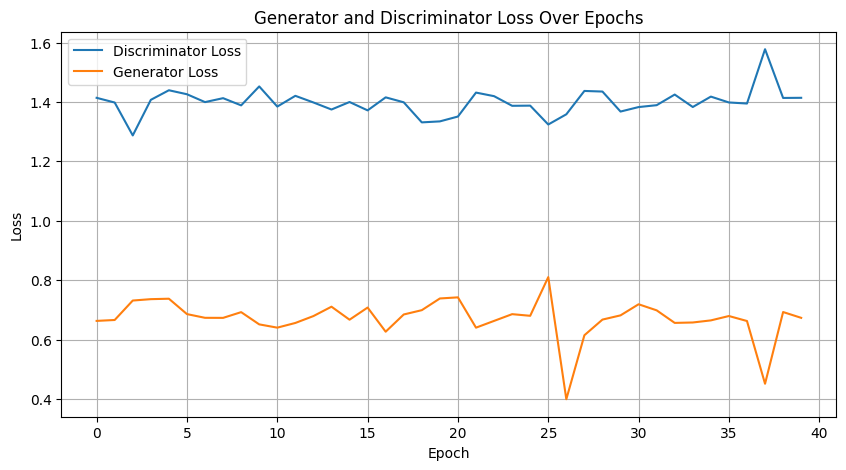

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(d_losses, label='Discriminator Loss')
plt.plot(g_losses, label='Generator Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Generator and Discriminator Loss Over Epochs')
plt.grid(True)
plt.show()

In [30]:
# Generate new samples
num_samples = 1000
z = torch.randn(num_samples, noise_dim)
generated_samples = G(z).detach().numpy()
# Inverse transform to get original scale
generated_samples = scaler.inverse_transform(generated_samples)




In [31]:
# Preprocess generated data
generated_df = pd.DataFrame(generated_samples, columns=gan_transactions.columns)

    
generated_df['remote'] = np.array(list(map(process_remote, generated_df['remote'])))
generated_df['amount'] = np.array(list(map(process_positive, generated_df['amount']))).round(2)
generated_df['hour'] = np.array(list(map(process_hour, generated_df['hour'])))
generated_df['payee_x'] = np.array(list(map(process_coordinates, generated_df['payee_x'])))
generated_df['payee_y'] = np.array(list(map(process_coordinates, generated_df['payee_y'])))

generated_df.head(), gan_transactions.head()

(   remote  amount     payee_x     payee_y  hour
 0       0   22.75  159.278214  124.122719     8
 1       0   21.66  148.908127  122.782463     8
 2       0   19.64  137.353149  116.228004     8
 3       0   22.09  165.891998  124.495071     8
 4       0   22.63  165.605591  134.108093     8,
    remote  amount  payee_x  payee_y  hour
 0       0   53.19      124       96    12
 1       0    7.15      124       96    14
 2       0    6.18      124       96     7
 3       0   33.56      124       96    10
 4       0   87.91      124       96     9)

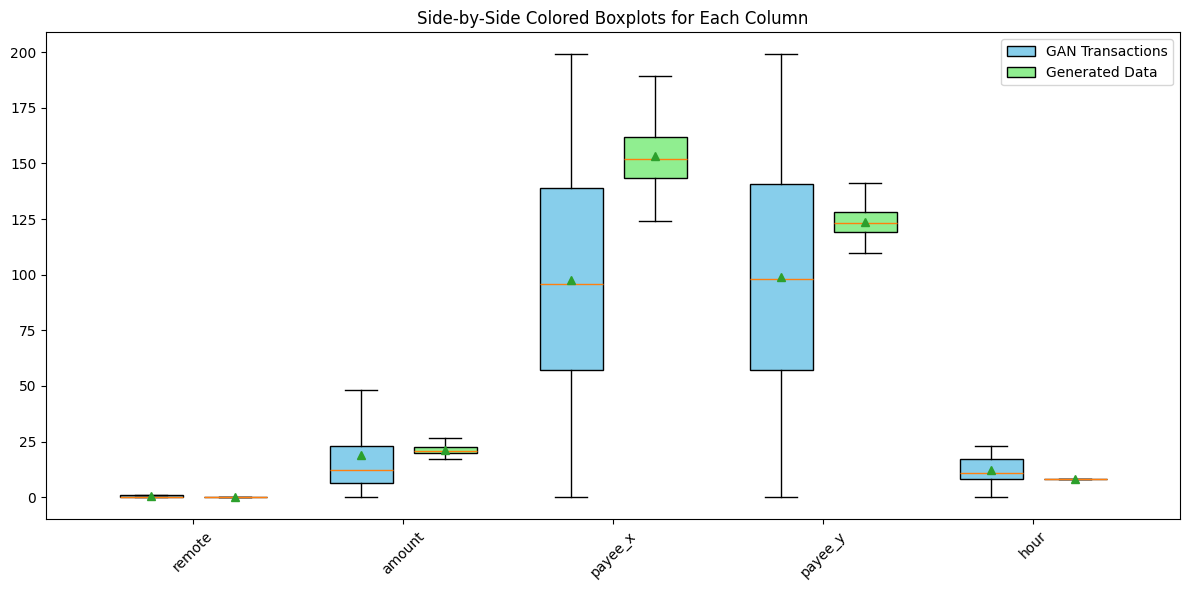

In [32]:
# Plot boxplot of original data and generated data

import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.pyplot as plt
import numpy as np

# Number of columns
num_columns = len(gan_transactions.columns)

fig, ax = plt.subplots(figsize=(12, 6))

# Positions for each box
positions1 = np.arange(1, num_columns + 1) - 0.2
positions2 = np.arange(1, num_columns + 1) + 0.2

# Plot both datasets
bp1 = ax.boxplot(gan_transactions.values, positions=positions1, widths=0.3, patch_artist=True, showfliers=False, showmeans=True)
bp2 = ax.boxplot(generated_df.values, positions=positions2, widths=0.3, patch_artist=True, showfliers=False, showmeans=True)

# Set face colors for the boxes
color1 = 'skyblue'
color2 = 'lightgreen'

for box in bp1['boxes']:
    box.set(facecolor=color1)

for box in bp2['boxes']:
    box.set(facecolor=color2)

# Set x-axis labels
ax.set_xticks(np.arange(1, num_columns + 1))
ax.set_xticklabels(gan_transactions.columns, rotation=45)

ax.set_title('Side-by-Side Colored Boxplots for Each Column')

# Custom legend using patches
from matplotlib.patches import Patch
legend_patches = [
    Patch(facecolor=color1, edgecolor='black', label='GAN Transactions'),
    Patch(facecolor=color2, edgecolor='black', label='Generated Data')
]

ax.legend(handles=legend_patches)

plt.tight_layout()
plt.show()

In [33]:
np.array([-1, 4, 0, 0 , 12]).astype(bool).astype(int)

array([1, 1, 0, 0, 1])